## Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
%matplotlib inline

In [48]:
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

## Veri Setinin Yüklenmesi

In [49]:
df = pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Veri Setinin İncelenmesi

In [3]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()
# numerik verilerimizin özeti

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()
# hiç null değerimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Preprocessing

In [6]:
df = df.drop('Booking_ID', axis=1)

features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

target = 'booking_status'

#### Kategorik Verilerin Sayısal Verilere Dönüştürülmesi (Encoding)

In [7]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])

In [8]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


#### Bellek Kullanımını Azaltmak (Downcasting)

In [9]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  uint8  
 1   no_of_children                        36275 non-null  uint8  
 2   no_of_weekend_nights                  36275 non-null  uint8  
 3   no_of_week_nights                     36275 non-null  uint8  
 4   type_of_meal_plan                     36275 non-null  uint8  
 5   required_car_parking_space            36275 non-null  uint8  
 6   room_type_reserved                    36275 non-null  uint8  
 7   lead_time                             36275 non-null  uint16 
 8   arrival_year                          36275 non-null  uint16 
 9   arrival_month                         36275 non-null  uint8  
 10  arrival_date                          36275 non-null  uint8  
 11  market_segment_

## Keşif Analizi

#### Hedef Sütunumuzun İncelemesi

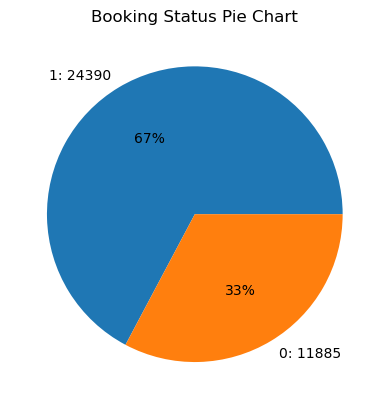

In [37]:
booking_status = df['booking_status']

counts = booking_status.value_counts()

plt.pie(counts, labels=[f"{label}: {count}" for label, count in zip(counts.index, counts)], autopct='%1.0f%%')
plt.title('Booking Status Pie Chart')
plt.show()

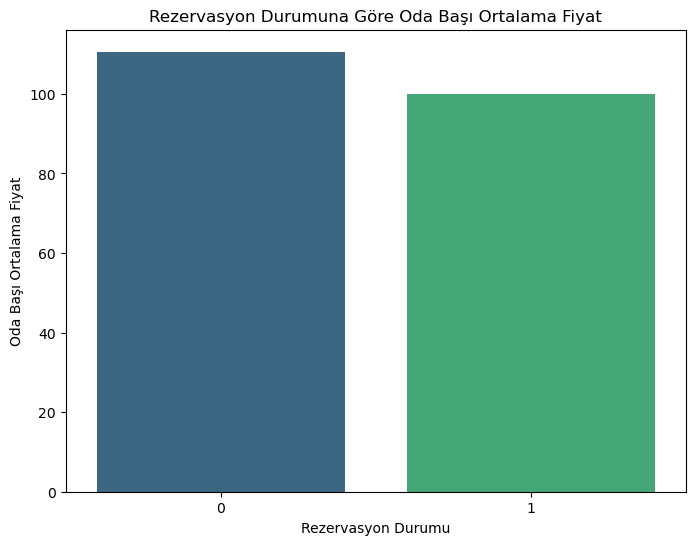

In [11]:
average_price_status = df.groupby('booking_status')['avg_price_per_room'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_price_status, x="booking_status", y="avg_price_per_room", palette="viridis")

plt.title('Rezervasyon Durumuna Göre Oda Başı Ortalama Fiyat')
plt.xlabel('Rezervasyon Durumu')
plt.ylabel('Oda Başı Ortalama Fiyat')
plt.show()

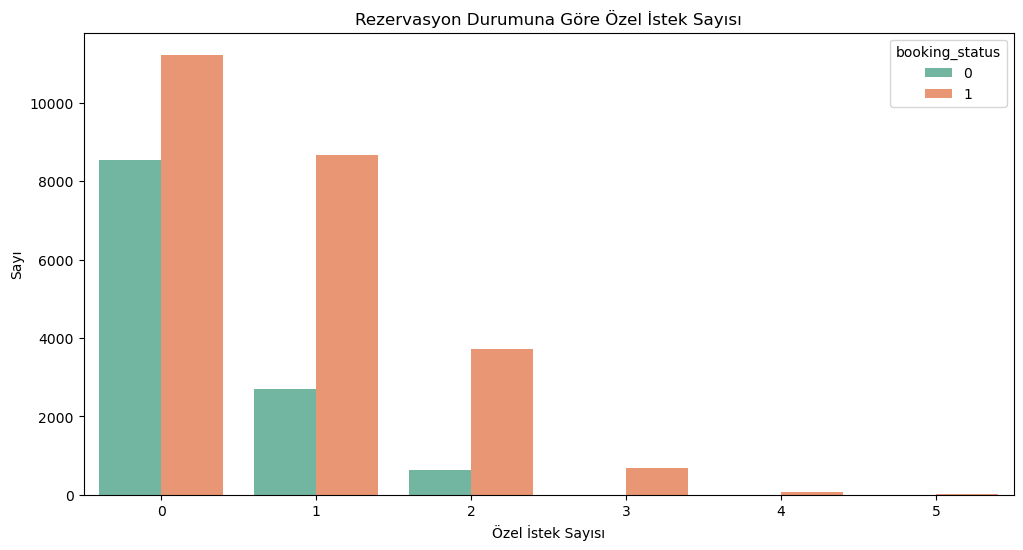

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="no_of_special_requests", hue='booking_status', palette="Set2")

plt.title('Rezervasyon Durumuna Göre Özel İstek Sayısı')
plt.xlabel('Özel İstek Sayısı')
plt.ylabel('Sayı')
plt.show()

### Korelasyon Matrisi

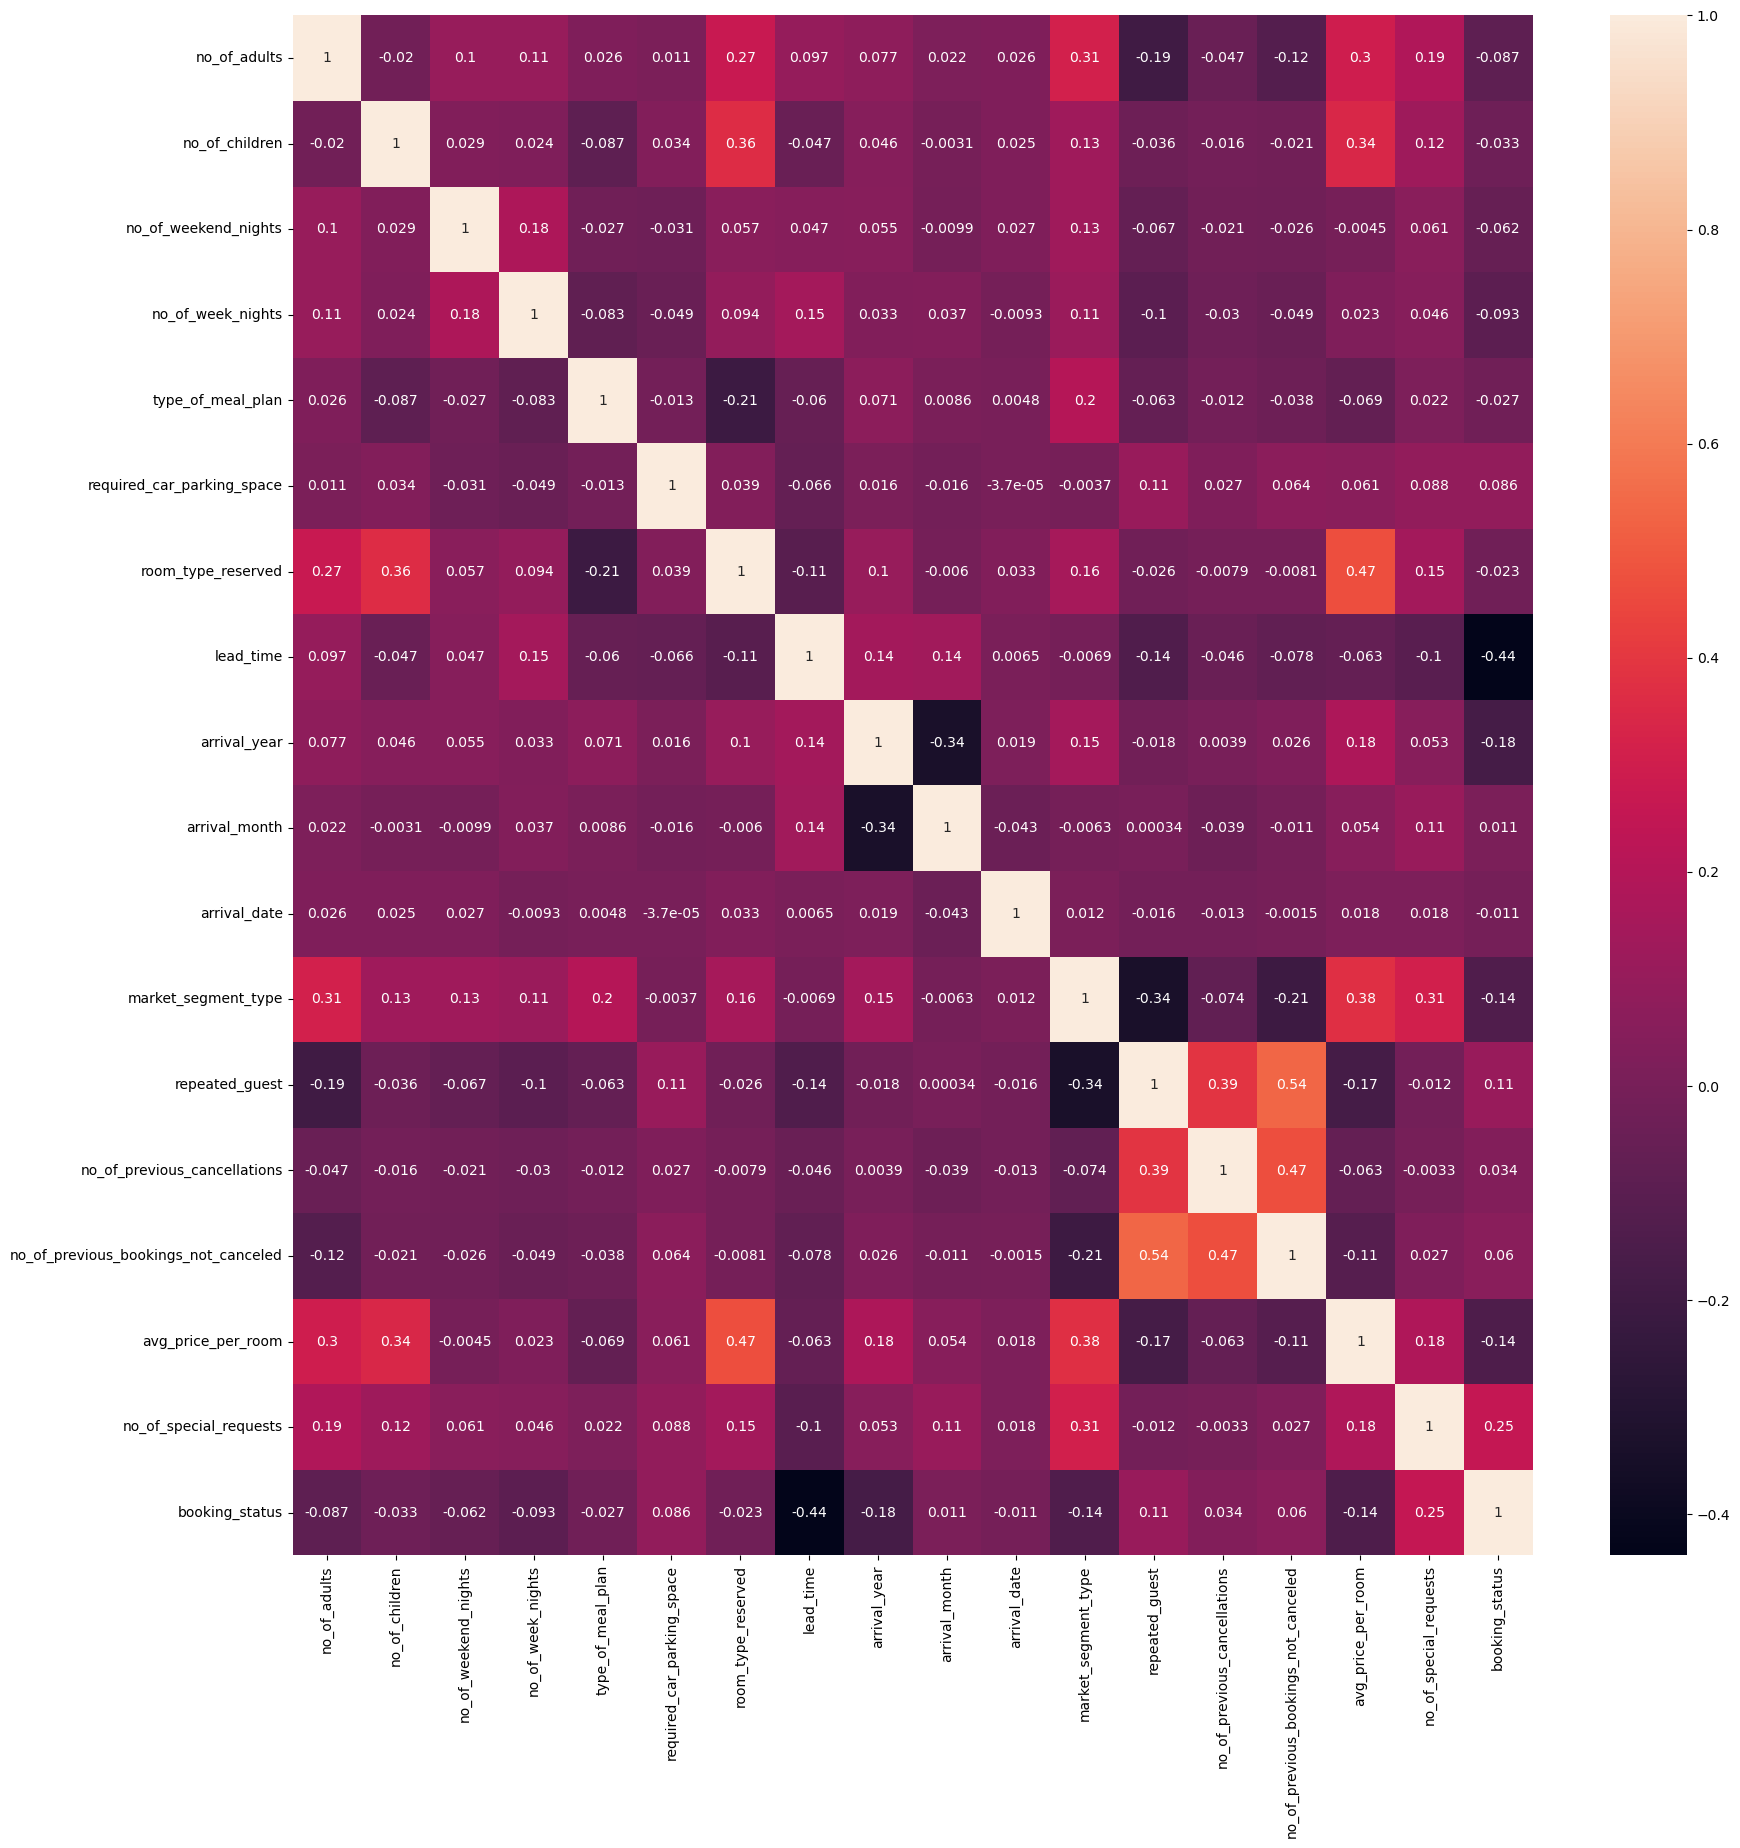

In [13]:
sns.heatmap(df.corr(), annot=True )
plt.gcf().set_size_inches(20, 20)

## Modeller

In [14]:
df_original = df.copy()

In [16]:
# Sınıflandırma modelleri
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

In [17]:
# SMOTE işlemi öncesi veri setini kullanarak model eğitimi ve testi
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(df_original[features], df_original[target], test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_original_train, y_original_train)
    y_original_pred = model.predict(X_original_test)
    original_report = classification_report(y_original_test, y_original_pred)

    print(f"{model_name} (SMOTE Öncesi):")
    print(original_report)
    print("\n")

Decision Tree (SMOTE Öncesi):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2416
           1       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



Random Forest (SMOTE Öncesi):
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255



Logistic Regression (SMOTE Öncesi):
              precision    recall  f1-score   support

           0       0.75      0.58      0.65      2416
           1       0.81      0.90      0.85      4839

    accuracy                           0.79      7255
   macro avg       0.78     

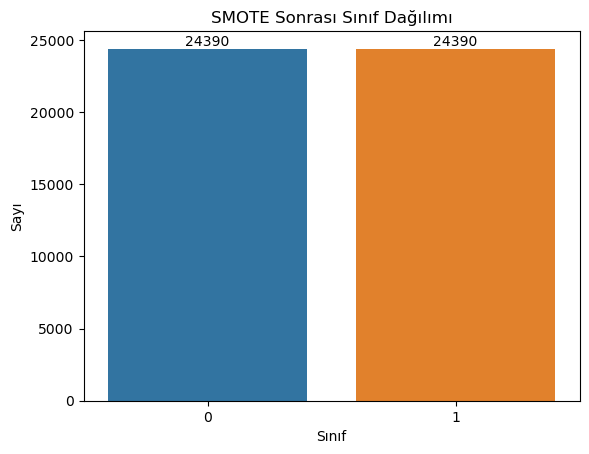

In [41]:
# SMOTE işlemi
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sm.fit_resample(df[features], df[target])

class_counts = pd.Series(y_resampled).value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('SMOTE Sonrası Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')

for i, value in enumerate(class_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    print(f"{model_name}:")
    print(f"  Eğitim Doğruluğu: {train_accuracy:.4f}")
    print(f"  Test Doğruluğu: {test_accuracy:.4f}")
    print("\n")

Decision Tree:
  Eğitim Doğruluğu: 0.9945
  Test Doğruluğu: 0.8620


Random Forest:
  Eğitim Doğruluğu: 0.9945
  Test Doğruluğu: 0.9043


Logistic Regression:
  Eğitim Doğruluğu: 0.7792
  Test Doğruluğu: 0.7805


XGBoost:
  Eğitim Doğruluğu: 0.9172
  Test Doğruluğu: 0.8918


KNN:
  Eğitim Doğruluğu: 0.8687
  Test Doğruluğu: 0.8044


Naive Bayes:
  Eğitim Doğruluğu: 0.4467
  Test Doğruluğu: 0.4531


SVM:
  Eğitim Doğruluğu: 0.7605
  Test Doğruluğu: 0.7560


Neural Network:
  Eğitim Doğruluğu: 0.7533
  Test Doğruluğu: 0.7543




In [44]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name}:")
    print(report)
    print("\n")

Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2448
           1       0.90      0.89      0.90      4869

    accuracy                           0.86      7317
   macro avg       0.85      0.85      0.85      7317
weighted avg       0.86      0.86      0.86      7317



Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2448
           1       0.91      0.95      0.93      4869

    accuracy                           0.90      7317
   macro avg       0.90      0.88      0.89      7317
weighted avg       0.90      0.90      0.90      7317



Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      2448
           1       0.80      0.90      0.84      4869

    accuracy                           0.78      7317
   macro avg       0.76      0.72      0.74      7317
weighted avg       

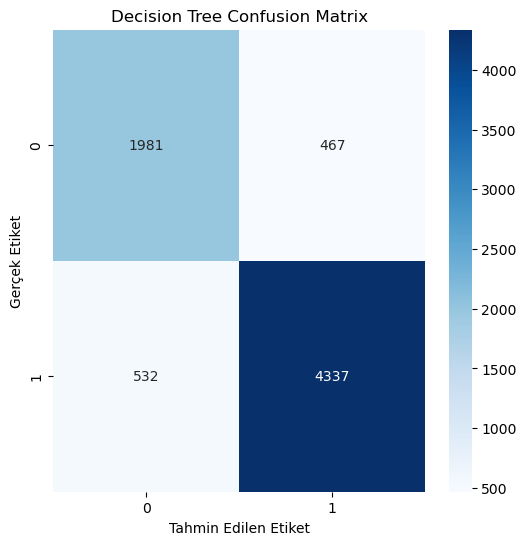

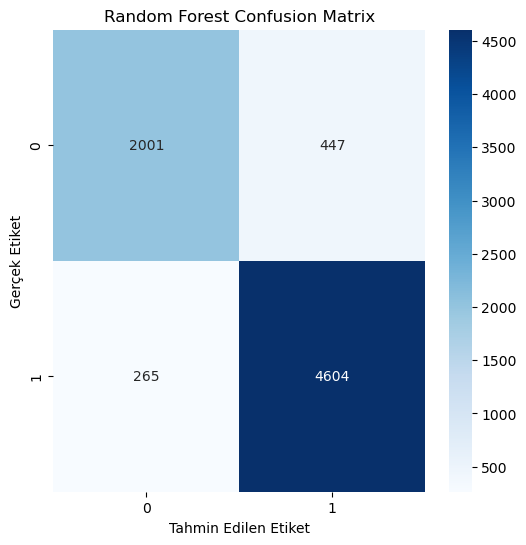

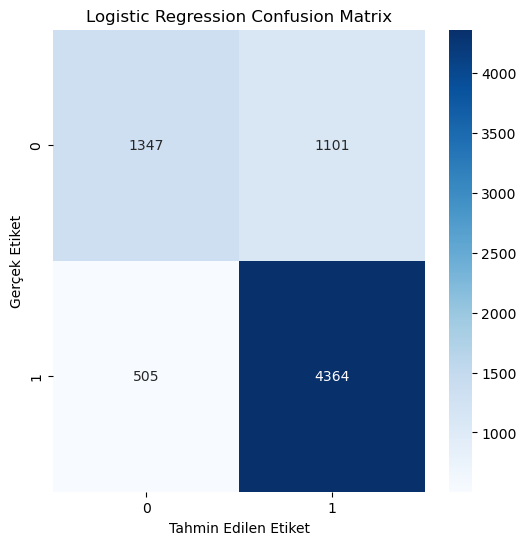

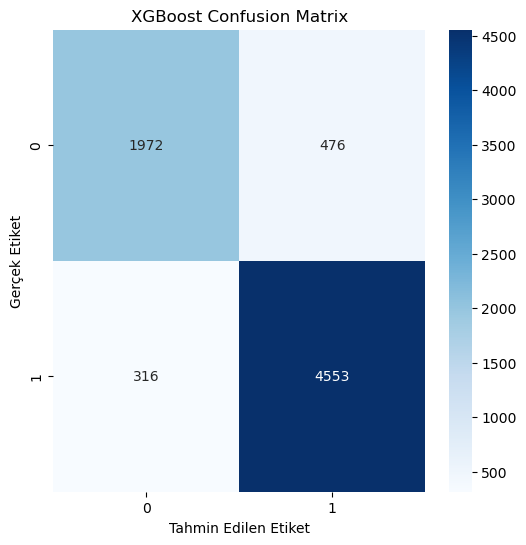

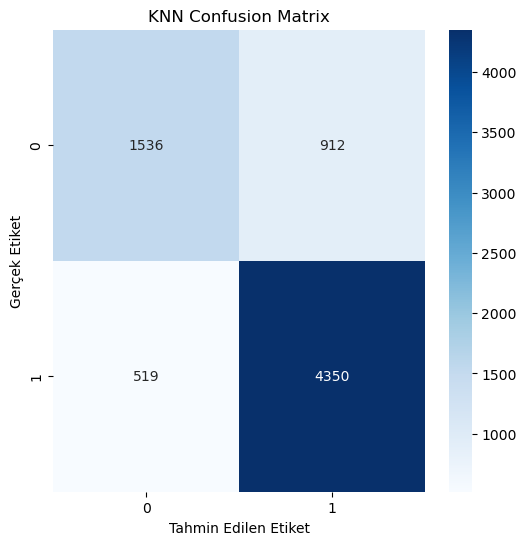

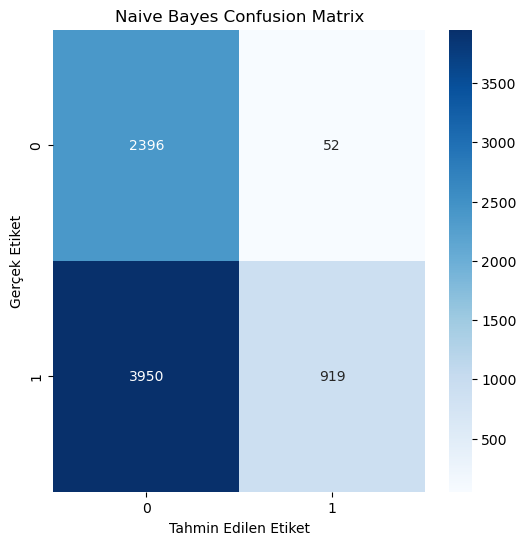

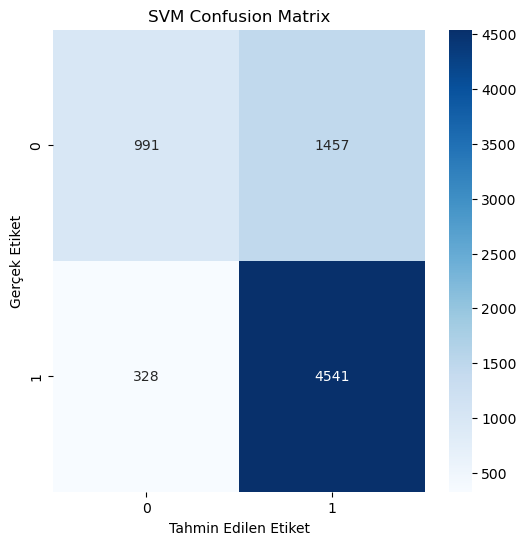

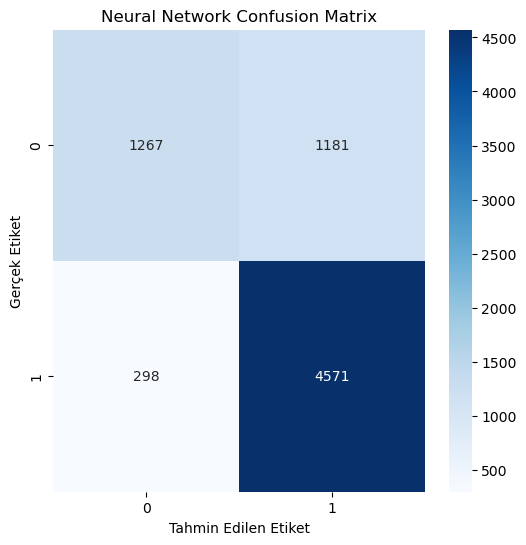

In [45]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Tahmin Edilen Etiket")
    plt.ylabel("Gerçek Etiket")
    plt.show()